In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import imshow
from joblib import dump, load
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# <font color='blue'> Classification MNIST dataset </font>

In [15]:
tr=pd.read_csv("D:\\A.my documents\\A.opencv\\A.Python\\datasets\\MNIST\\mnist_train.csv")
tr

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# te=pd.read_csv("D:\\A.my documents\\A.opencv\\A.Python\\datasets\\MNIST\\mnist_test.csv")
# te

In [16]:
x_train=tr.drop(tr.columns[[0]],axis=1)
#x_test=te.drop(te.columns[[0]],axis=1)
print(x_train)
#print(x_test)

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0        0    0    0    0    0    0    0    0    0     0  ...      0      0   
1        0    0    0    0    0    0    0    0    0     0  ...      0      0   
2        0    0    0    0    0    0    0    0    0     0  ...      0      0   
3        0    0    0    0    0    0    0    0    0     0  ...      0      0   
4        0    0    0    0    0    0    0    0    0     0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
59995    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59996    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59997    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59998    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59999    0    0    0    0    0    0    0    0    0     0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28

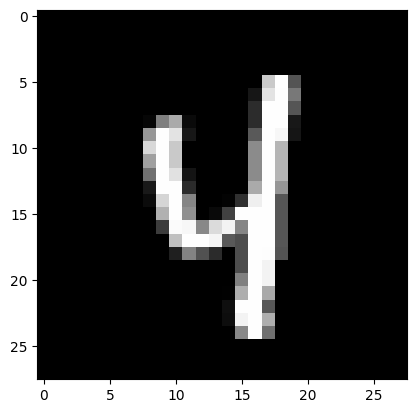

In [17]:
d=x_train.iloc[1006,:]
d=np.array(d)
d=d.reshape(28,28)
plt.imshow(d,cmap='gray')

In [18]:
y_train=tr.iloc[:,0]
print(y_train)
# y_test=te.iloc[:,0]
# print(y_test)

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64


In [12]:
x_train.shape

(60000, 784)

In [100]:
x_test.shape

(10000, 784)

In [19]:
x_train=x_train/255
#x_test=x_test/255

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1,random_state = 0)

In [21]:
X_train.shape

(54000, 784)

In [22]:
digits1 = RandomForestClassifier(max_depth=9, random_state=0)
digits1.fit(X_train, y_train)
y_pred=digits1.predict(X_test)
print(y_pred)

[3 6 6 ... 7 6 5]


In [26]:
dump(digits1, 'RF_M.joblib')

['RF_M.joblib']

In [29]:
RF_Model=load('RF_M.joblib')
y_pred1=RF_Model.predict(X_test)
y_pred1

array([3, 6, 6, ..., 7, 6, 5], dtype=int64)

In [23]:
acc=accuracy_score(y_test,y_pred)*100
acc

94.35

In [24]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:',mse)

Mean squared error: 0.9651666666666666


[4]


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


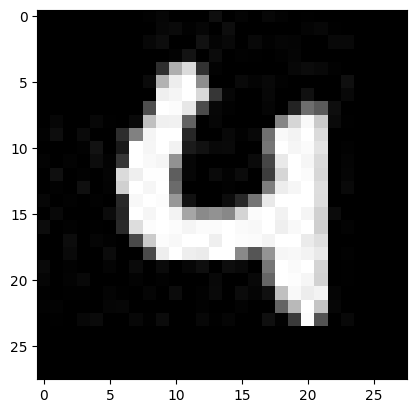

In [25]:
img3_1=cv2.imread('D:\\A.my documents\\A.opencv\\A.Python\\MNIST\\sample\\762.jpg')

img2=copy.copy(img3_1)
img2=resize(img2,(28,28,1))

img2=np.array(img2).reshape(-1,784)

img2=img2/255.0
#img2.shape
y_pred_test=digits1.predict(img2)
print(y_pred_test)
plt.imshow(img3_1)